In [4]:
import os
import numpy as np
import pandas as pd
from skimage import io, color, measure
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, binary_erosion, disk
from skimage.segmentation import clear_border
from skimage.util import img_as_ubyte
from tqdm import tqdm
import matplotlib.pyplot as plt


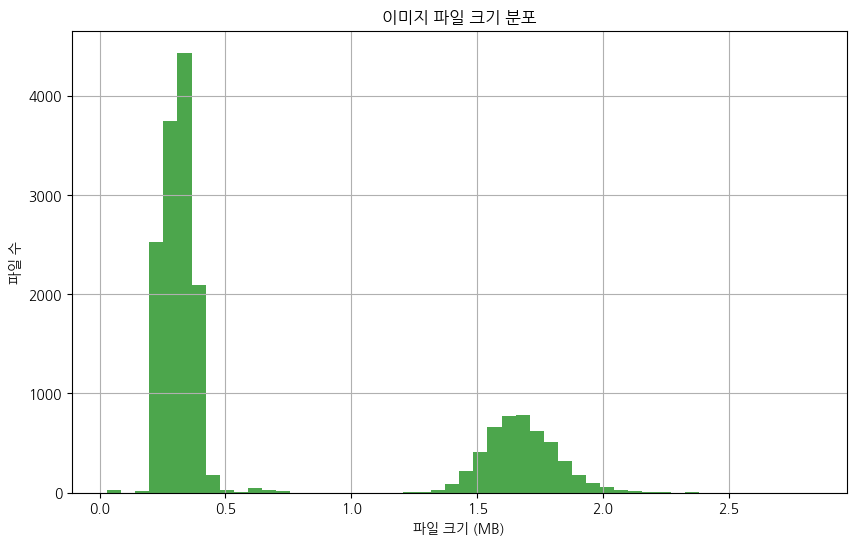

In [4]:
# 이미지 폴더 경로
folder_path = 'C:\\Users\\JBY\\Downloads\\data\\image'

# 이미지 파일 용량 저장할 리스트
file_sizes = []

# 폴더 내의 파일들을 탐색
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 파일 경로
        file_path = os.path.join(root, file)
        
        # 파일이 이미지인지 확인 (확장자 기준)
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            # 파일 크기를 메가바이트 단위로 변환하여 리스트에 추가
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # 메가바이트로 변환
            file_sizes.append(file_size)

# 결과를 히스토그램으로 시각화
plt.figure(figsize=(10,6))
plt.hist(file_sizes, bins=50, color='green', alpha=0.7)
plt.title('이미지 파일 크기 분포')
plt.xlabel('파일 크기 (MB)')
plt.ylabel('파일 수')
plt.grid(True)
plt.show()


In [3]:
# 1MB를 넘는 파일 개수
over_1mb_count = 0

# 폴더 내의 파일들을 탐색
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 파일 경로
        file_path = os.path.join(root, file)
        
        # 파일이 이미지인지 확인 (확장자 기준)
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            # 파일 크기를 메가바이트 단위로 변환
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # 메가바이트로 변환
            
            # 파일 크기가 1MB보다 큰 경우 카운트
            if file_size > 1:
                over_1mb_count += 1

print(f"1MB 이상의 파일 개수: {over_1mb_count}")

NameError: name 'folder_path' is not defined

In [7]:
# CSV 파일 로드
csv_path = 'C:\\Users\\user\\Downloads\\data\\data_cluster.csv'
data = pd.read_csv(csv_path)

# 처리할 행의 범위 지정
start_row = 3669  # 시작 행 (0부터 시작하는 인덱스를 사용)
end_row = 2999  # 종료 행

# 지정된 범위의 데이터만 선택
data = data.iloc[start_row:]

# 이미지 디렉토리 경로
image_dir = 'C:\\Users\\user\\Downloads\\data\\image'
output_dir = 'C:\\Users\\user\\Downloads\\data'

# 에러 로그 파일
error_log_path = 'C:\\Users\\user\\Downloads\\data\\error_log.txt'

# 데이터프레임의 각 행에 대해 반복 (tqdm으로 진행 상황 표시)
for index, row in tqdm(data.iterrows(), total=data.shape[0]):
    newID = row['newID']
    cluster = row['cluster']

    try:
        # 이미지 파일 경로
        img_path = os.path.join(image_dir, f"{newID}.jpg")

        # 이미지 로드
        input_image = io.imread(img_path)

        # 그레이스케일로 변환
        gray_image = color.rgb2gray(input_image)

        # Otsu's method를 사용하여 이진화
        thresh = threshold_otsu(gray_image)
        binary_image = gray_image > thresh

        # 이미지 전처리
        binary_image = binary_closing(binary_image, disk(3))
        binary_image = clear_border(binary_image)
        binary_image = binary_erosion(binary_image, disk(2))

        # 레이블링된 영역 추출
        label_image = measure.label(binary_image)
        regions = measure.regionprops(label_image)

        # 가장 큰 영역 찾기
        largest_region = max(regions, key=lambda region: region.area)

        # 가장 큰 영역의 bounding box 좌표 가져오기
        min_row, min_col, max_row, max_col = largest_region.bbox

        # 가장 큰 영역 추출
        largest_area_image = input_image[min_row:max_row, min_col:max_col]

        # 전처리된 이미지 저장할 경로
        save_path = os.path.join(output_dir, str(cluster), f"{newID}.jpg")

        # 이미지 저장
        io.imsave(save_path, img_as_ubyte(largest_area_image))
    except Exception as e:
        # 에러 메시지 작성
        error_message = f"Error processing image {newID}: {str(e)}\n"
        
        # 에러 메시지를 로그 파일에 기록
        with open(error_log_path, 'a') as error_file:
            error_file.write(error_message)

print("선택된 범위의 이미지 처리 완료.")

 23%|██▎       | 3644/15614 [52:12<1:11:12,  2.80it/s] C:\Users\user\AppData\Local\Temp\ipykernel_4884\4286531498.py:60: UserWarning: C:\Users\user\Downloads\data\2\1009-19.jpg is a low contrast image
  io.imsave(save_path, img_as_ubyte(largest_area_image))
100%|██████████| 15614/15614 [1:48:04<00:00,  2.41it/s] 

선택된 범위의 이미지 처리 완료.
